In [1]:
# import needed libraries
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 

import rvesimulator
from rvesimulator.simulators.path_generator import PathGenerator
 

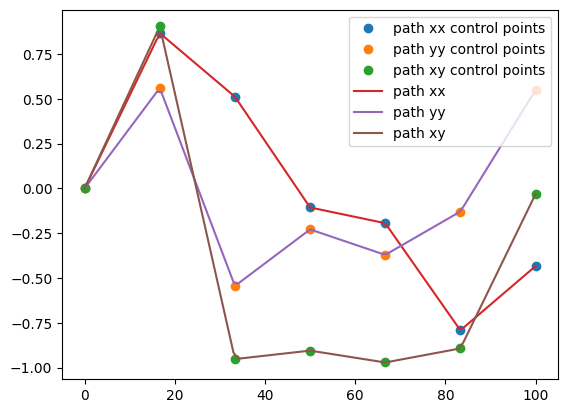

In [2]:
# show to use the path generator to generate the path loads 
path_generater = PathGenerator(num_control_points=7, num_increment=100) 

# linear interpolate 
path_linear = path_generater.linear_interpolate()
path_generater.plot_path() 

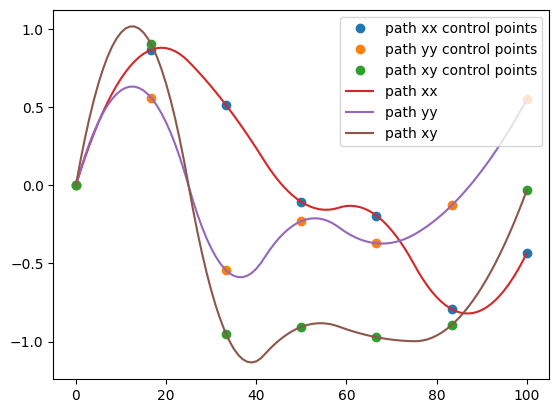

In [3]:
# linear interpolate 
path_quadratic = path_generater.quadratic_interpolate()
path_generater.plot_path() 